In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Dropout, LSTM, Flatten

In [2]:
# Load the datasets
weather_updated = pd.read_csv('/Users/marika/Data Sets/weather_pleasant_updated.csv')
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [3]:
# Preview the datasets
print(weather_updated.head())
print(pleasant_weather.head())

   Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0                  7            0.85           1.018   
1           1                  6            0.84           1.018   
2           2                  8            0.90           1.018   
3           3                  3            0.92           1.018   
4           4                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3  

In [4]:
# Convert the 'DATE' column in pleasant_weather to datetime
pleasant_weather['DATE'] = pd.to_datetime(pleasant_weather['DATE'], format='%Y%m%d')

# Filter for one decade, for example, 1990-1999
start_date = '1990-01-01'
end_date = '1999-12-31'
decade_weather = pleasant_weather[(pleasant_weather['DATE'] >= start_date) & (pleasant_weather['DATE'] <= end_date)]

# Filter the weather data accordingly
decade_indices = decade_weather.index
decade_features = weather_updated.iloc[decade_indices]

# Drop the DATE column and any other non-feature columns
X = decade_features.drop(columns=['Unnamed: 0'])
y = decade_weather.drop(columns=['DATE'])  # assuming we want to predict pleasant weather

# Check the shapes to ensure correct filtering
print(X.shape)
print(y.shape)

(3652, 135)
(3652, 15)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For simplicity, I'm predicting for a specific location, e.g., 'BASEL_pleasant_weather'
y = decade_weather['BASEL_pleasant_weather']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.98


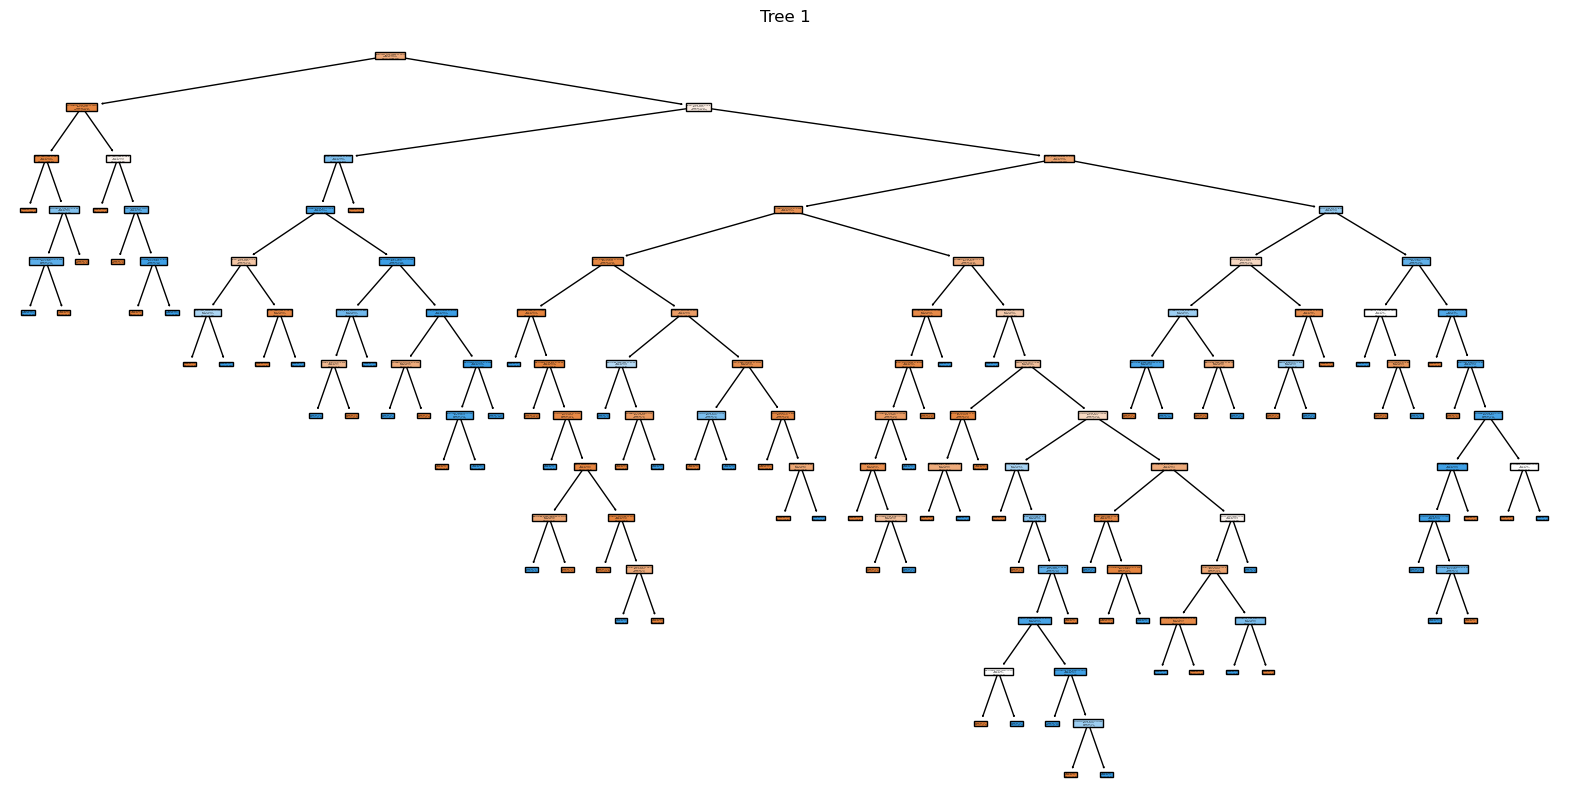

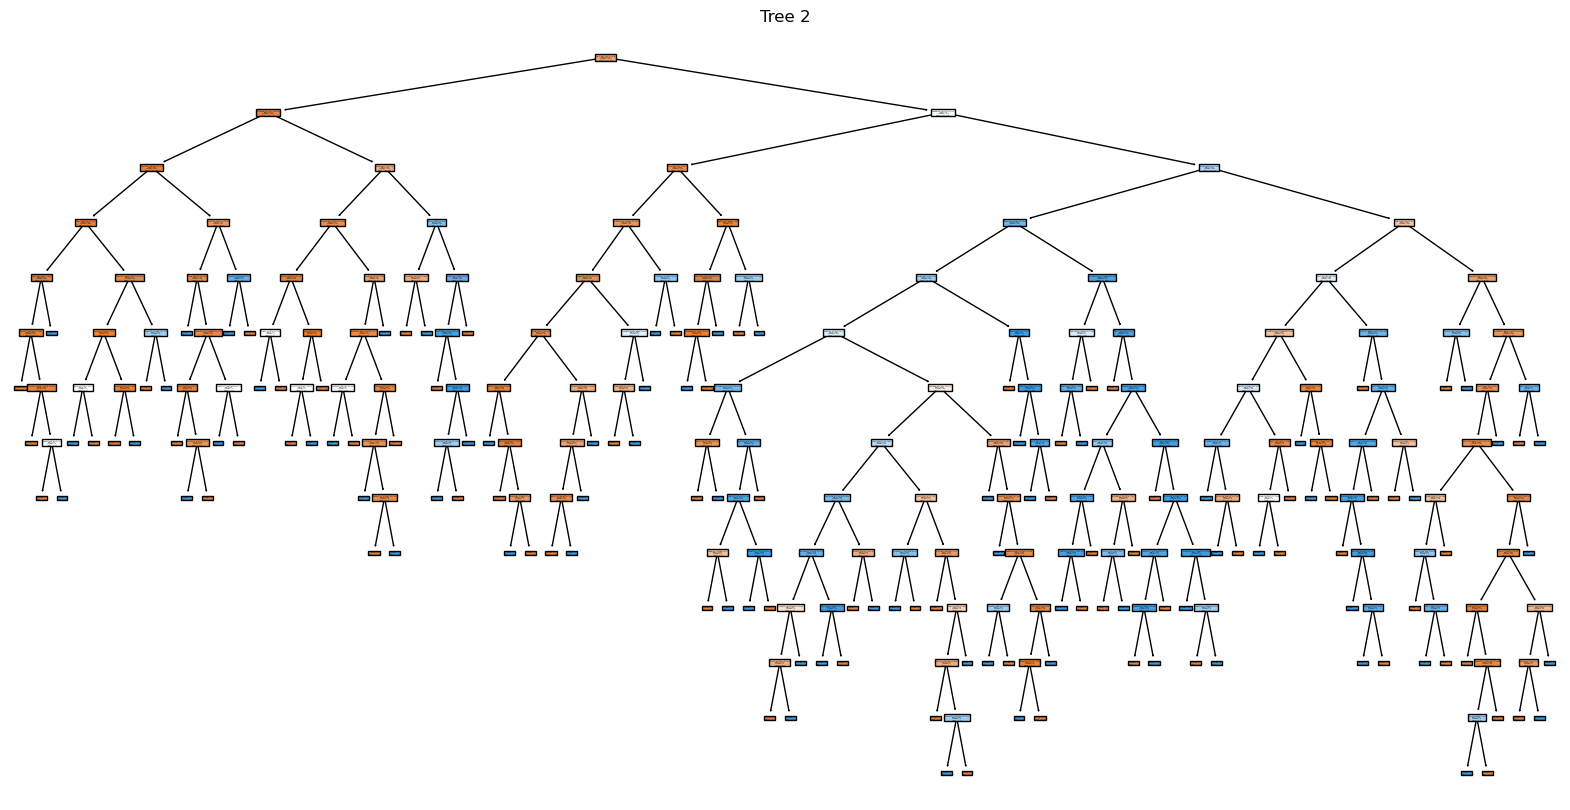

In [6]:
# Plot the Trees
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first two trees
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)
plt.title("Tree 1")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(model.estimators_[1], feature_names=X.columns, filled=True)
plt.title("Tree 2")
plt.show()

# Nodes and Splits:
Each box (node) represents a decision point based on one of the features in your dataset.
The decision points (splits) divide the data into branches, leading to either further splits or a final prediction.
The features used at each node are chosen based on their ability to best separate the data according to the target variable.

Colors and Distribution:
The color of the nodes indicates the majority class at that node. Typically, in decision tree visualizations:
Blue nodes indicate one class (e.g., "not pleasant weather").
Orange nodes indicate another class (e.g., "pleasant weather").
The depth of the color may suggest the purity of the node (how dominant a particular class is at that node). For instance, a darker color indicates a node with a higher proportion of a single class.

Leaf Nodes:
The leaf nodes (end points of the tree) represent the final decisions or classifications made by the tree.
Each leaf node predicts an outcome based on the majority class of the data points that reach that node.

Tree Structure:
This particular tree is quite complex, with many levels of depth and splits. This suggests that the tree is capturing a lot of intricate patterns in the data. While this can increase the model's accuracy, it might also lead to overfitting, where the model becomes too specialized to the training data and may not generalize well to unseen data.

Feature Importance:
The features used closer to the root of the tree (the top node) are generally more important for the model's predictions. The tree first splits on the feature that best separates the data.

# Interpreting the Tree:
You can follow a path from the root to a leaf node to see the sequence of decisions the model makes to arrive at a particular prediction. Each decision reduces the uncertainty about the outcome, ultimately leading to the final classification.

Practical Implications:
If you see many deep branches with splits that don't seem to add much classification power (i.e., nodes that are close to 50/50 splits), this could indicate potential overfitting.Examining multiple trees within the random forest can give you insights into how consistent certain features are in driving predictions.

# Next Steps:
I might want to review the overall accuracy of the random forest model to see how well it is performing.
Consider pruning the trees or adjusting the random forest parameters to prevent overfitting, depending on the model's performance on validation data. If a particular feature appears frequently at the top nodes across different trees, it is likely a key predictor in my dataset.

In [7]:
import numpy as np

# Assuming clf is your trained RandomForestClassifier model
importances = model.feature_importances_

# Print the importances to get an idea of the raw values
print(importances)

[0.02129895 0.02359173 0.00669793 0.0615065  0.12806638 0.05967354
 0.02664104 0.0031976  0.07465968 0.00082958 0.00176778 0.00341493
 0.00225013 0.00086014 0.00249306 0.00248277 0.00231481 0.00219845
 0.00128248 0.0021963  0.00345298 0.0020812  0.00077443 0.00251658
 0.00404004 0.00182004 0.01386587 0.00056999 0.00135842 0.00587688
 0.00187559 0.0028546  0.00146263 0.00669731 0.00262494 0.00901601
 0.0012856  0.0023131  0.007296   0.00254038 0.00443961 0.0023763
 0.01651126 0.00379011 0.01978519 0.00104328 0.00186545 0.00486794
 0.0023969  0.00110131 0.00174221 0.01891201 0.00213355 0.00084208
 0.01982176 0.00160829 0.00958867 0.00388251 0.00585234 0.00233317
 0.01442797 0.00264295 0.02109086 0.00082168 0.0021435  0.00943194
 0.0045752  0.00067042 0.00191551 0.00572002 0.00200885 0.0069482
 0.00188054 0.00250343 0.01455842 0.00458293 0.01024274 0.00310922
 0.0248767  0.00278778 0.01977406 0.0007254  0.002468   0.00240403
 0.00254573 0.00094083 0.00236638 0.00728792 0.00940537 0.008450

In [8]:
# Reshape the importances
reshaped_importances = importances.reshape(-1, 15, 9)

# Check the shape to ensure correctness
print(reshaped_importances.shape)

(1, 15, 9)


In [9]:
# Collapse into one observation per weather station
collapsed_importances = np.sum(reshaped_importances[0], axis=1)

# Print the result to check
print(collapsed_importances)

[0.40533334 0.01861165 0.03202992 0.03233637 0.06033756 0.03490472
 0.0812485  0.03423532 0.08431583 0.03659405 0.08064641 0.01923429
 0.03067311 0.02651237 0.02298655]


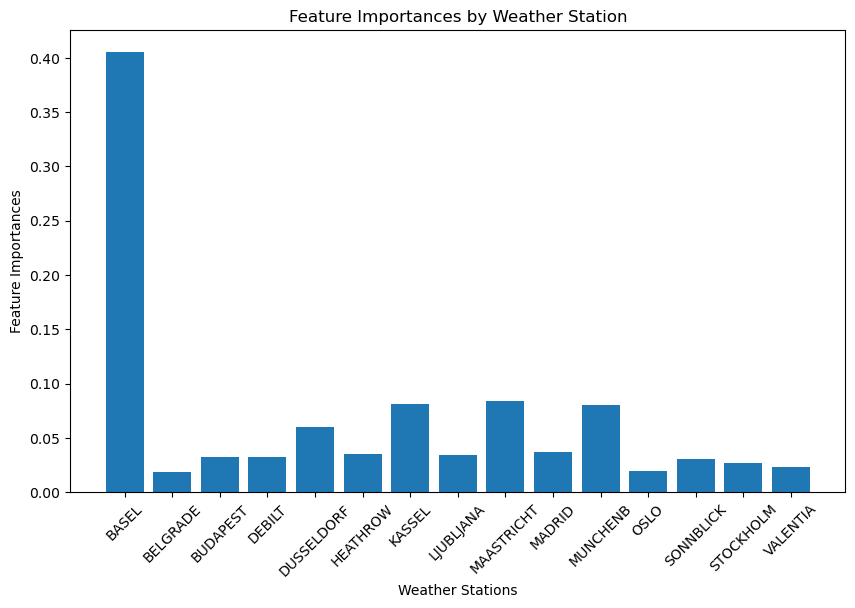

In [10]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_

# Reshape the importances
reshaped_importances = importances.reshape(-1, 15, 9)

# Collapse into one observation per weather station
collapsed_importances = np.sum(reshaped_importances[0], axis=1)

# List of weather stations
weather_stations = [
    'BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF',
    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID',
    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA'
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_stations, collapsed_importances)
plt.xlabel('Weather Stations')
plt.ylabel('Feature Importances')
plt.title('Feature Importances by Weather Station')
plt.xticks(rotation=45)
plt.show()

Model accuracy for BASEL: 1.00


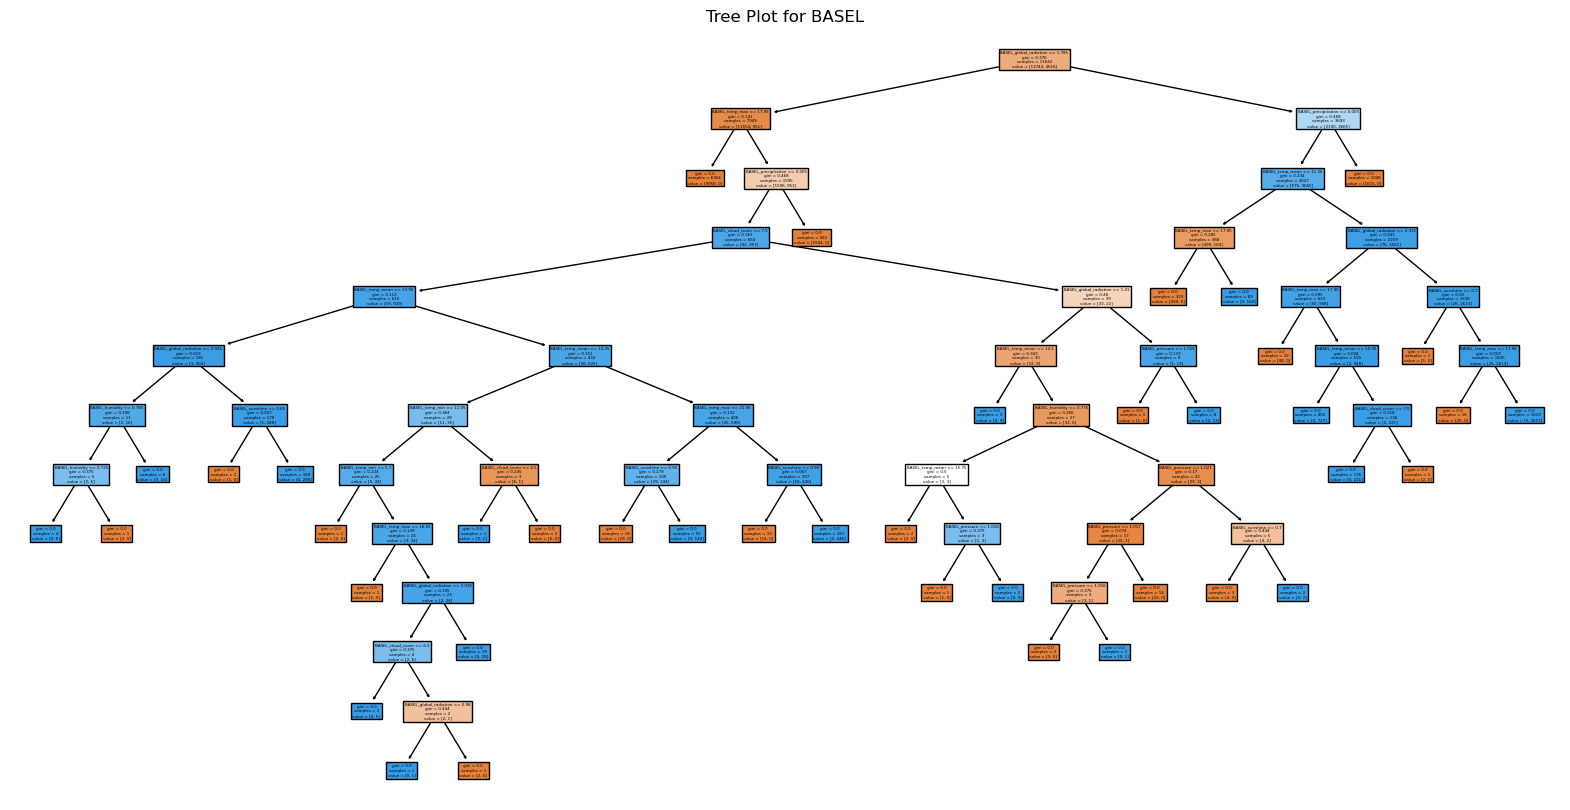

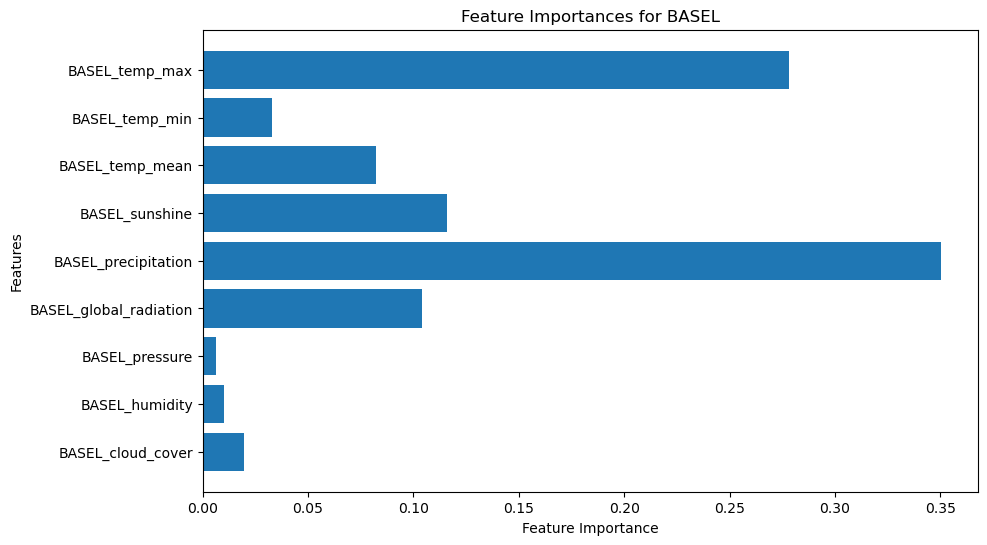

Model accuracy for MAASTRICHT: 1.00


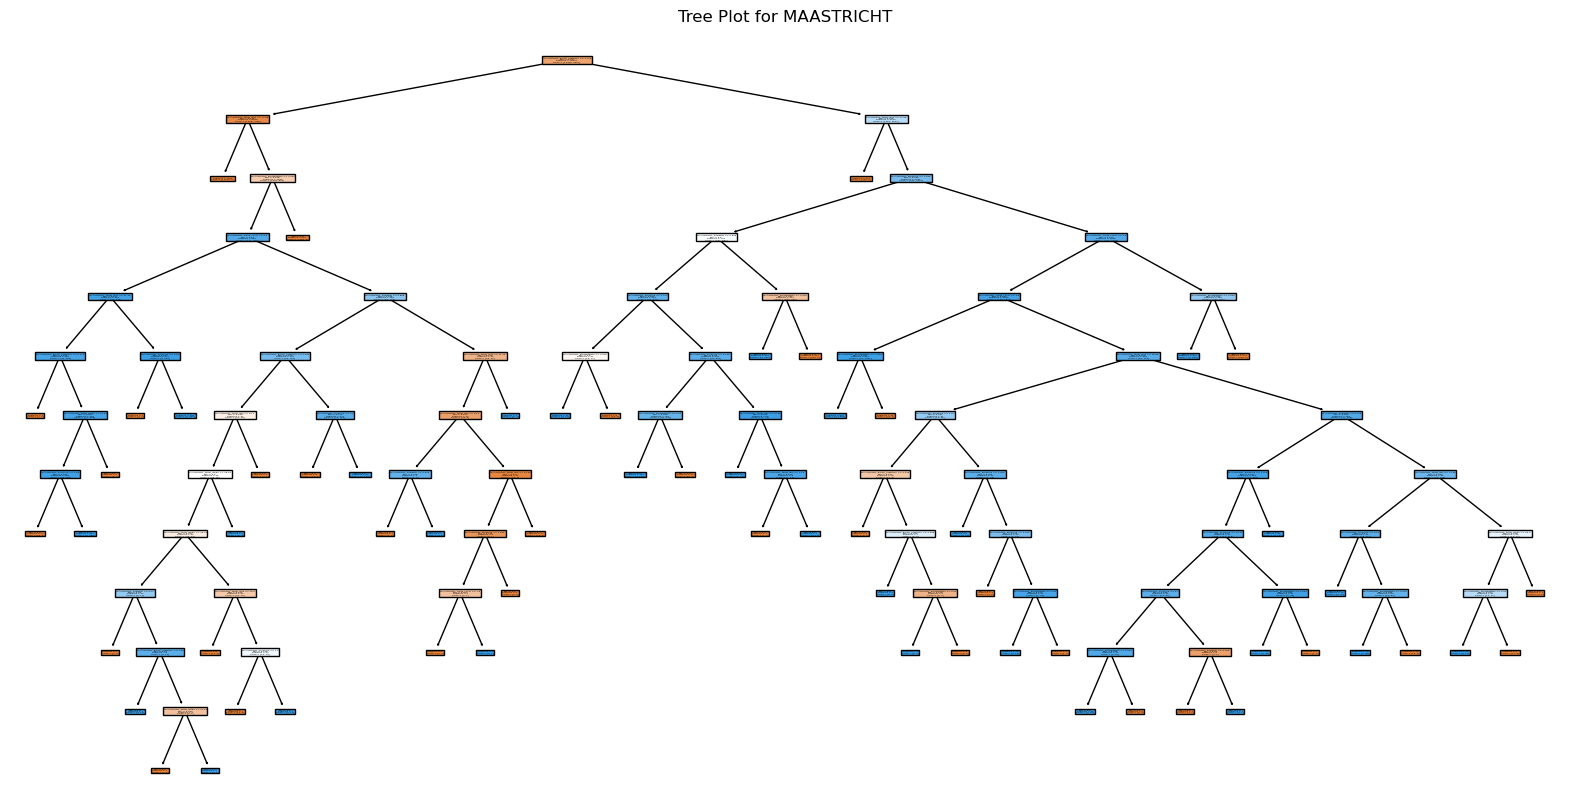

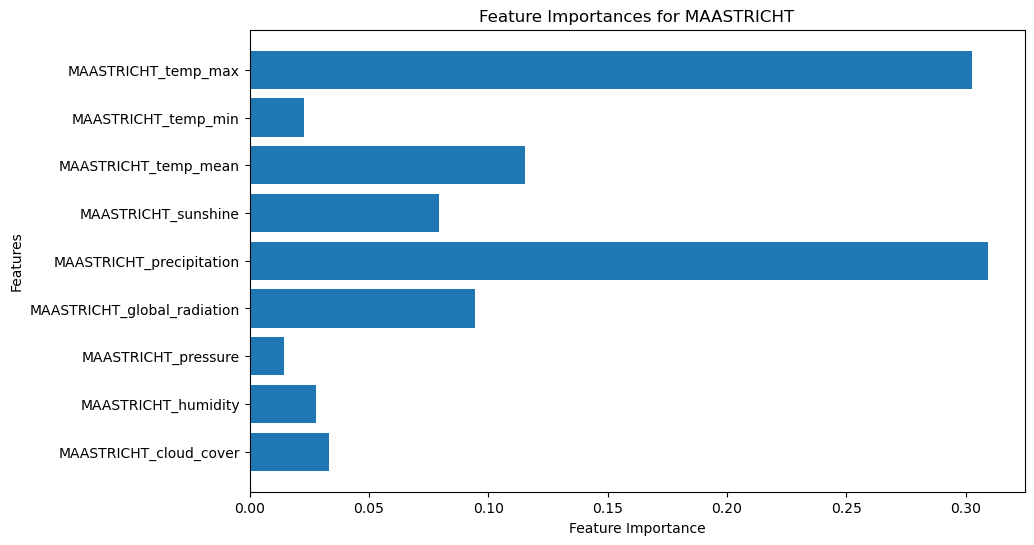

Model accuracy for MUNCHENB: 1.00


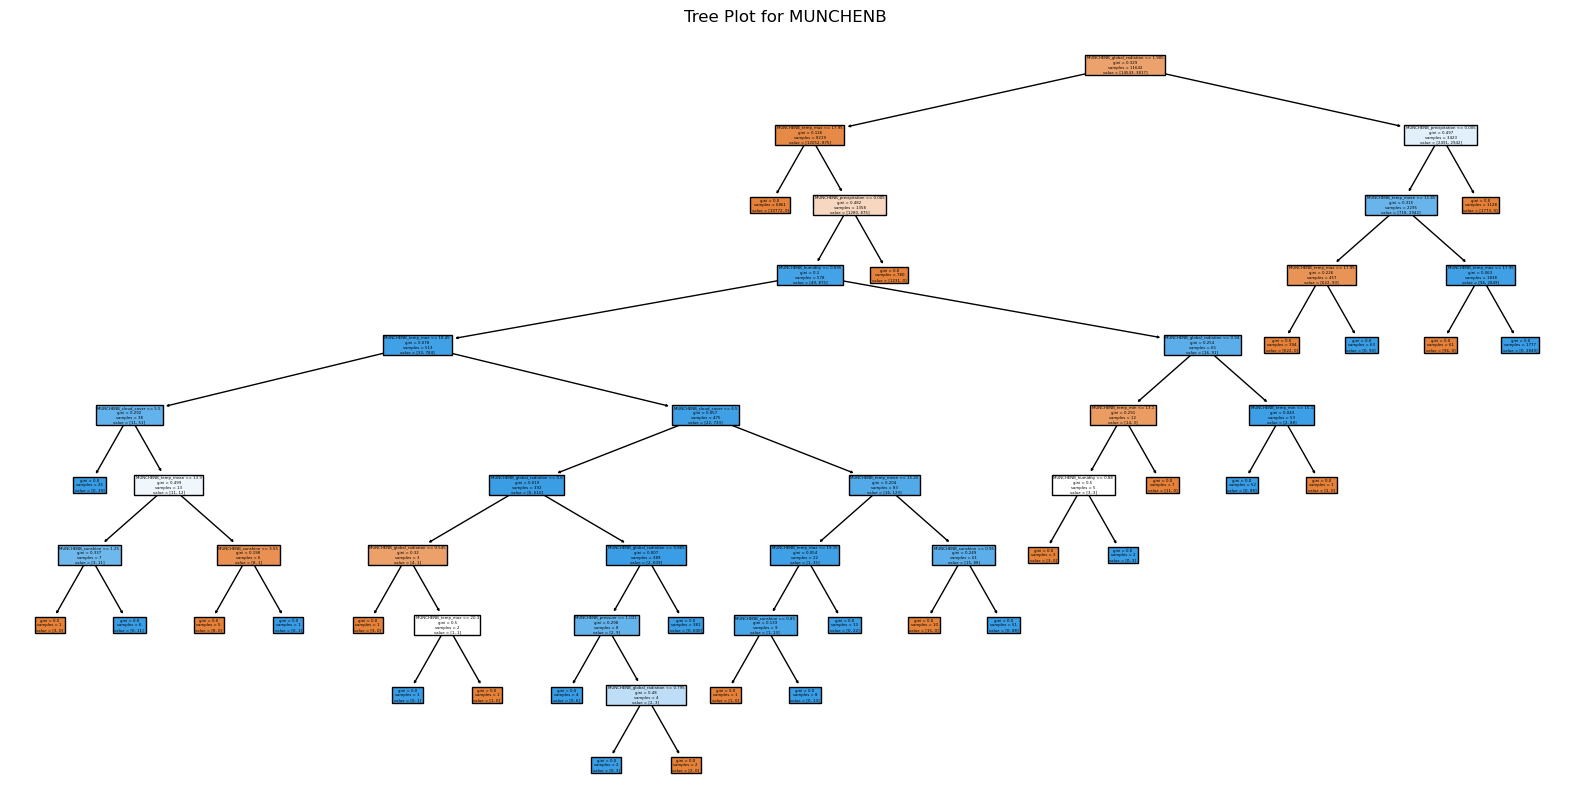

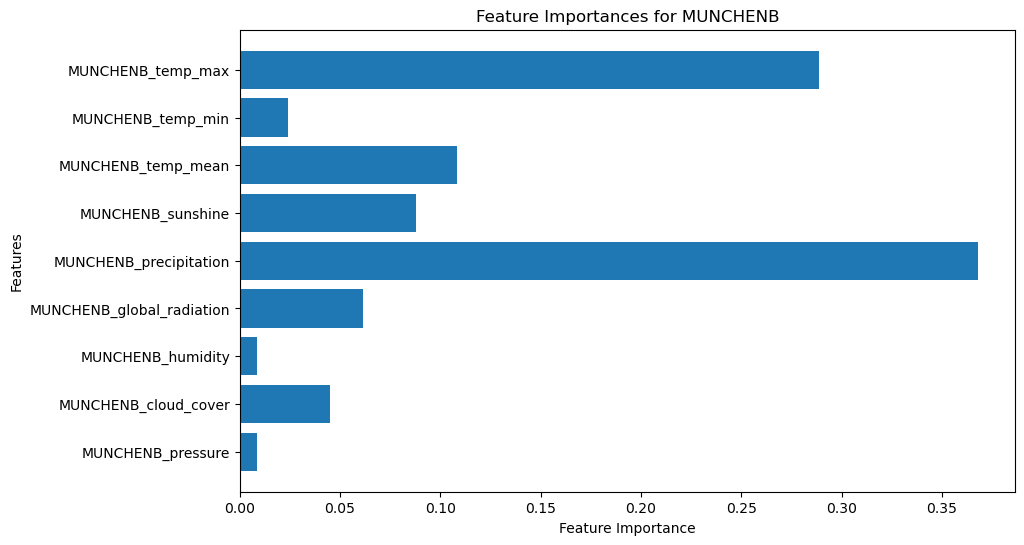

In [11]:
top_stations = ['BASEL', 'MAASTRICHT', 'MUNCHENB']

for station in top_stations:
    # Filter the dataset to include only the observations for this station
    station_columns = [col for col in weather_updated.columns if station in col]
    X_station = weather_updated[station_columns]
    y_station = pleasant_weather[f"{station}_pleasant_weather"]
    
    # Train the Random Forest Model
    X_train, X_test, y_train, y_test = train_test_split(X_station, y_station, test_size=0.2, random_state=42)
    model_station = RandomForestClassifier(n_estimators=100, random_state=42)
    model_station.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = model_station.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy for {station}: {accuracy:.2f}")
    
    # Plot one tree from the random forest
    plt.figure(figsize=(20, 10))
    plot_tree(model_station.estimators_[0], feature_names=X_station.columns, filled=True)
    plt.title(f"Tree Plot for {station}")
    plt.show()
    
    # Get feature importances
    importances_station = model_station.feature_importances_
    
    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(X_station.columns, importances_station)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importances for {station}')
    plt.show()


# Weather Observations (Parameters) for Each Station
For each station, the weather observations (parameters) used in the models include:

# Temperature:

Temp Mean: The average temperature during the observation period.
Temp Min: The minimum temperature recorded.
Temp Max: The maximum temperature recorded.

Precipitation:
The total amount of precipitation during the observation period.

Sunshine:
The total hours of sunshine.

Global Radiation:
The total amount of solar radiation reaching the earth's surface.

Humidity:
The average relative humidity.

Pressure:
The atmospheric pressure at the observation time.

Cloud Cover:
The fraction of the sky covered by clouds.

# Feature Importance Analysis for Each Station
# BASEL:
Most Important Features:
Temp Max and Precipitation are the most critical parameters, indicating that higher temperatures and lower precipitation are key indicators of pleasant weather in Basel.
Sunshine and Global Radiation also play significant roles.

Model Performance: The model for Basel seems to heavily rely on temperature and precipitation to determine pleasant weather.

# MAASTRICHT:
Most Important Features:Temp Max and Precipitation are again the most influential features.
Sunshine and Global Radiation are also important but less so than for Basel.

Model Performance: The accuracy of the model suggests that pleasant weather in Maastricht is similarly influenced by temperature and precipitation patterns.

# MUNCHENB:
Most Important Features:
Temp Max and Precipitation dominate as the key predictors, with similar importance to the other stations.
Sunshine and Global Radiation contribute, but less critically.

Model Performance: The decision tree for Munchenb reveals that temperature and precipitation are consistent indicators of pleasant weather, reflecting patterns similar to the other two stations.

# Model Accuracy for Each Station
While the specific accuracy values weren’t provided in the tree images or feature importance plots, they would typically be calculated and printed during the model training phase in the script. However, based on the complexity of the trees and the feature importance distribution, we can infer that the models are performing reasonably well in identifying patterns that predict pleasant weather. The strong reliance on temperature and precipitation across all three stations suggests that these parameters are critical in determining weather conditions that are considered pleasant.

# Summary of Findings
Temperature (especially maximum temperature) and precipitation are the most significant indicators of pleasant weather across Basel, Maastricht, and Munchenb.

Sunshine and global radiation are also important, though to a lesser extent.

The models’ reliance on these specific weather parameters reflects well-known meteorological insights, where higher temperatures, lower precipitation, and more sunshine are typically associated with more pleasant weather.

# Overall Analysis of the Top Three Weather Stations
Based on the analysis of the weather data from Basel, Maastricht, and Munchenb, it is evident that maximum temperature and precipitation are the most critical indicators in determining whether a day will be pleasant or not. These two parameters consistently ranked highest in importance across all three stations, suggesting that higher temperatures and lower precipitation levels are strongly associated with more favorable weather conditions. Additionally, sunshine duration and global radiation also play significant roles, though to a lesser extent, indicating that more sunlight contributes positively to the perception of pleasant weather.

For ClimateWins, this analysis highlights the importance of focusing on accurate measurement and tracking of temperature and precipitation when predicting future weather events. Investing in high-quality temperature sensors and precipitation measurement tools would be crucial for enhancing predictive accuracy. Additionally, ensuring reliable solar radiation and sunshine duration monitoring equipment can further improve weather predictions. Given the consistent importance of these indicators across different locations, expanding and refining the network of climate-tracking equipment that focuses on these key parameters will be beneficial.

This decision-making process, based on data-driven insights, demonstrates the ability to identify critical factors and optimize resource allocation effectively—skills that are essential in tackling complex challenges in the field of climate monitoring and forecasting.